In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Winedata.txt');

In [4]:
df.shape

(178, 14)

In [5]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',
       'Proline   '],
      dtype='object')

In [6]:
Y = df['class']

In [7]:
X = df.drop('class',axis = 1, inplace = False)

In [16]:
import seaborn as sns

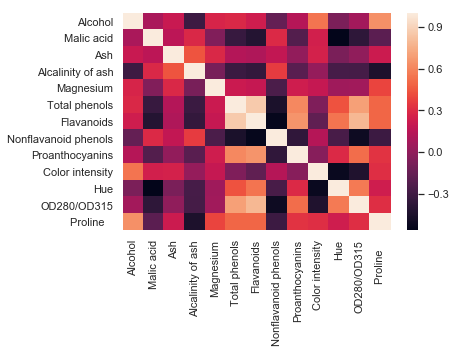

In [21]:
sns.heatmap(X.corr())

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
new_x = StandardScaler().fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(new_x,Y,test_size = 0.30,random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
model.score(x_test,y_test)

0.9814814814814815

In [33]:
from sklearn.model_selection import GridSearchCV

In [52]:
LR = LogisticRegression()
param_grid = {
                #'C' : np.logspace(-4,4,20),
                'C': [0.001,0.01,0.5,0.1,1,10,50,100,500,550,600,650,700,1000],
                'penalty' : ['l1','l2']
             }

In [57]:
new_LR = GridSearchCV(LR,param_grid,cv=5)

In [58]:
new_LR.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.5, 0.1, 1, 10, 50, 100, 500, 550, 600, 650, 700, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
new_LR.score(x_test,y_test)

0.9814814814814815

In [61]:
new_LR.best_params_

{'C': 10, 'penalty': 'l1'}

In [62]:
y_predict = new_LR.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,y_predict)

array([[19,  0,  0],
       [ 1, 20,  0],
       [ 0,  0, 14]], dtype=int64)